In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import random
random.seed(100)
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [6]:
df.rename(columns={'T Stage ': 'T Stage'}, inplace=True)
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
df["Grade"].value_counts()

Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64

In [8]:
df["Grade"] = df["Grade"].apply(lambda x: int(x.replace(" anaplastic; Grade IV", "4")))

## Data exploration and visualization

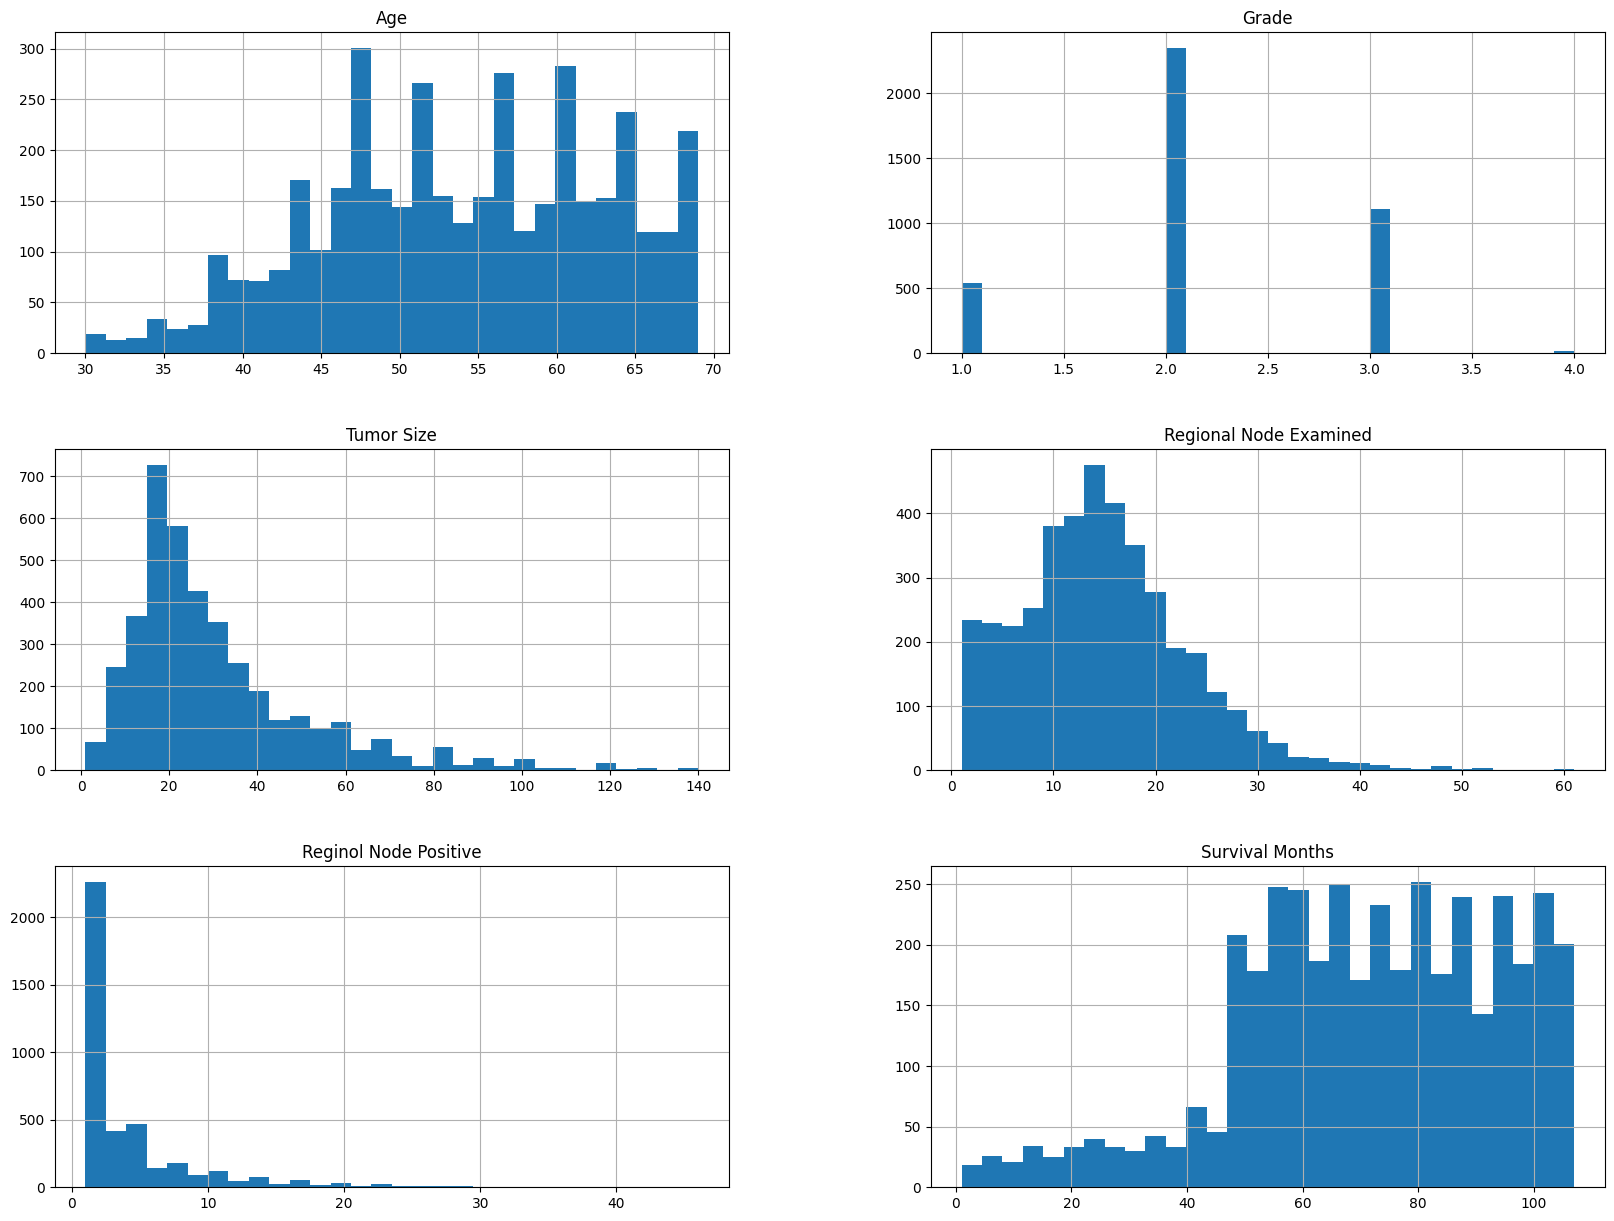

In [9]:
df.hist(bins=30, figsize=(20,15))
plt.show()

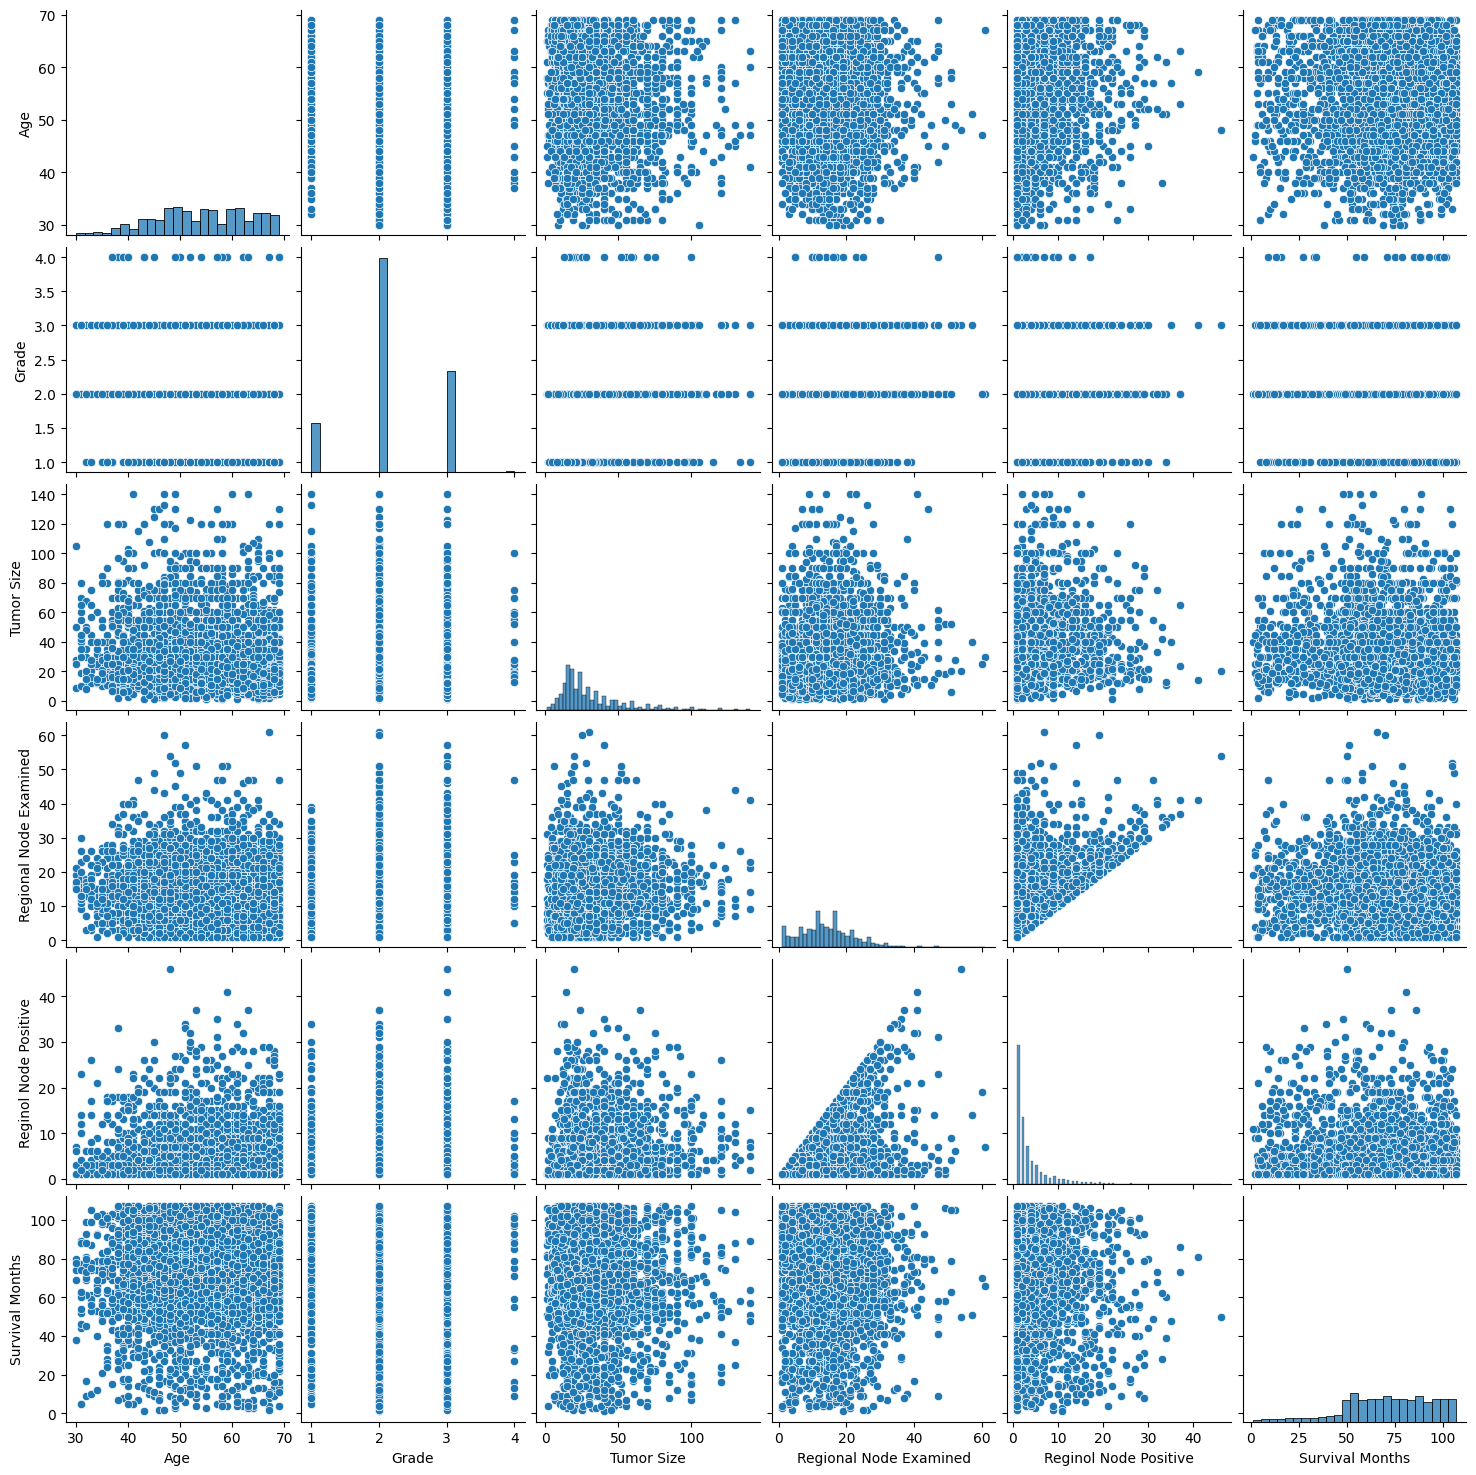

In [10]:
sns.pairplot(df)  
plt.show()

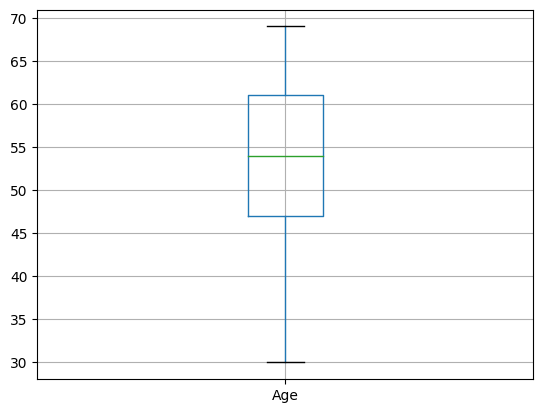

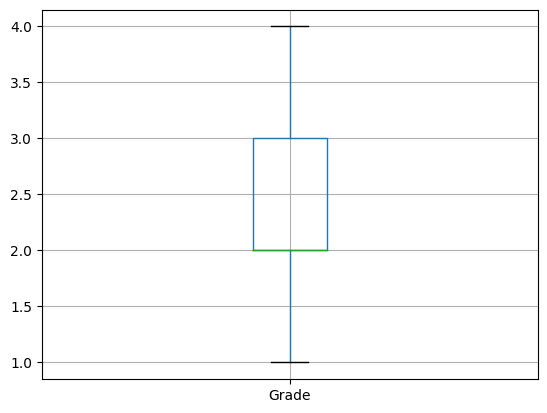

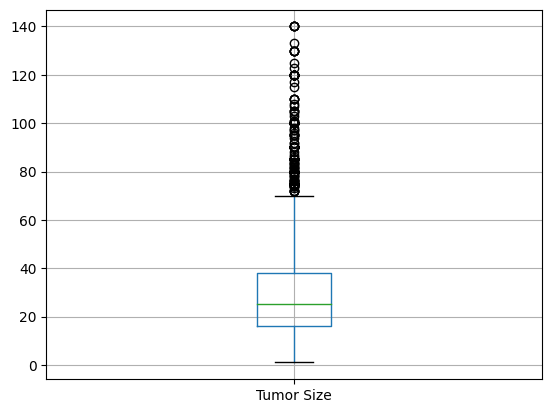

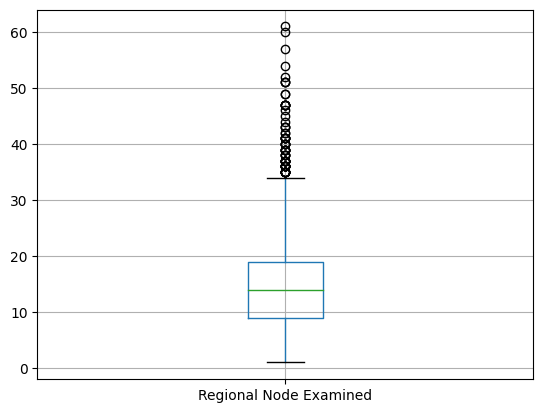

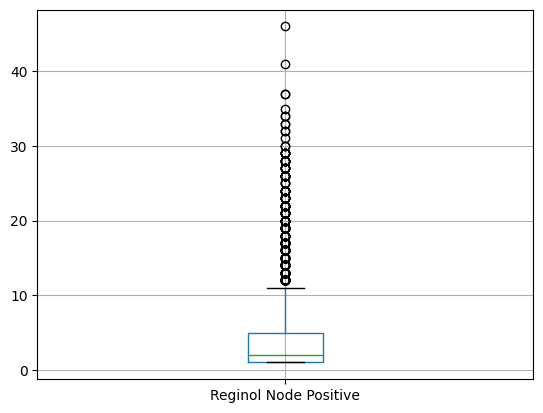

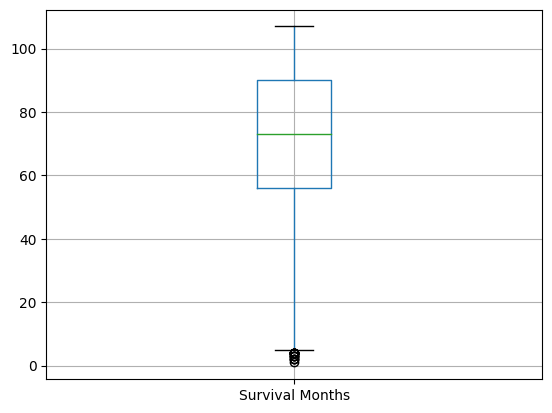

In [11]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure() 
    df.boxplot([column])  
plt.show()

In [12]:
print(df.columns)
plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.show()

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


ValueError: could not convert string to float: 'White'

<Figure size 1000x800 with 0 Axes>


Race
White    3413
Other     320
Black     291
Name: Race, dtype: int64


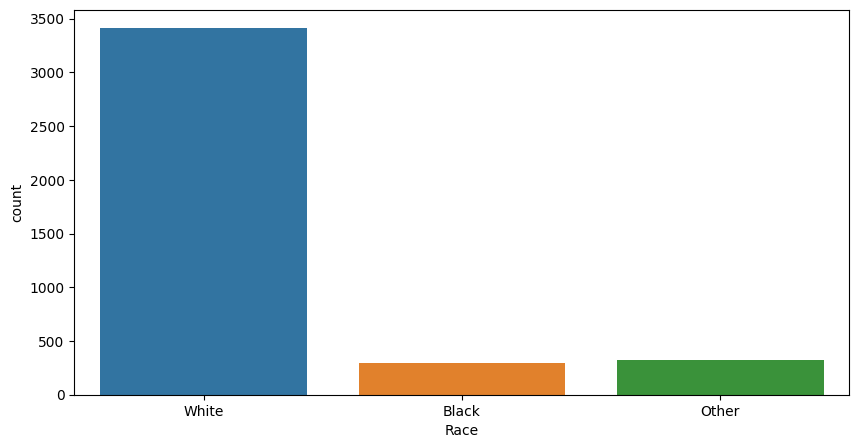


Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64


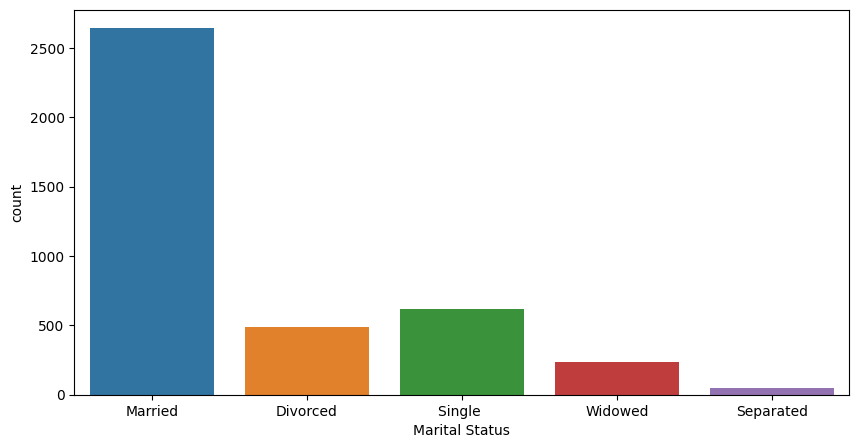


T Stage
T2    1786
T1    1603
T3     533
T4     102
Name: T Stage, dtype: int64


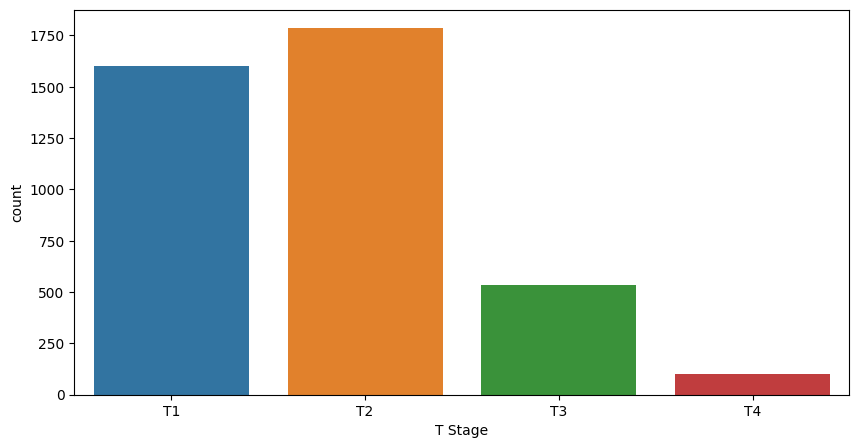


N Stage
N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64


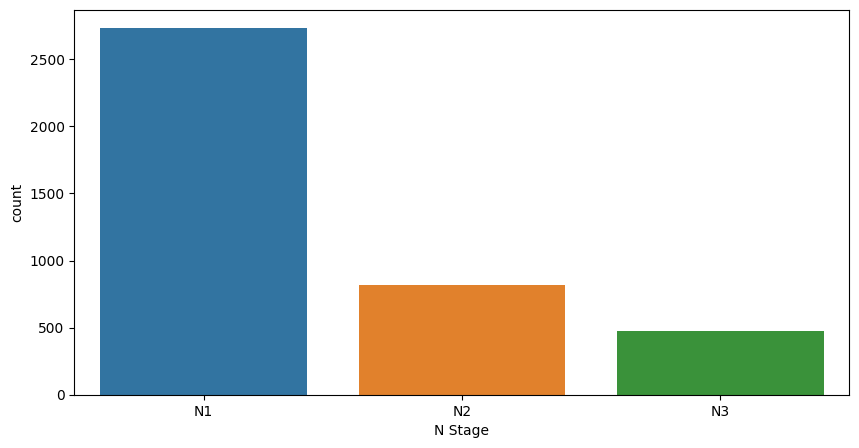


6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64


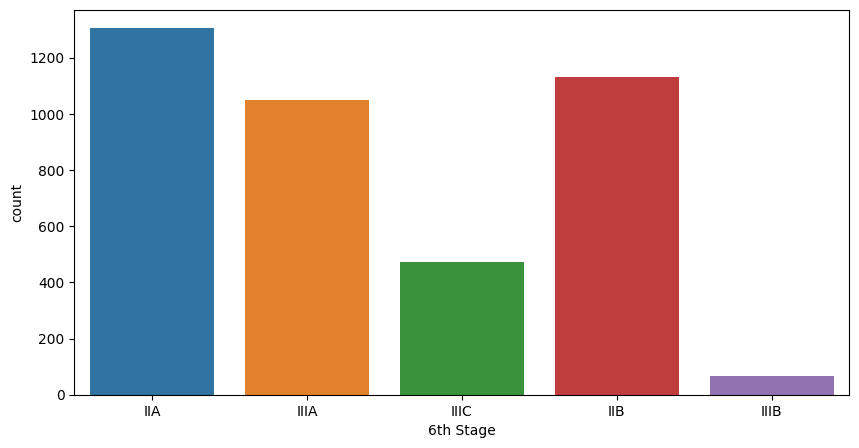


differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64


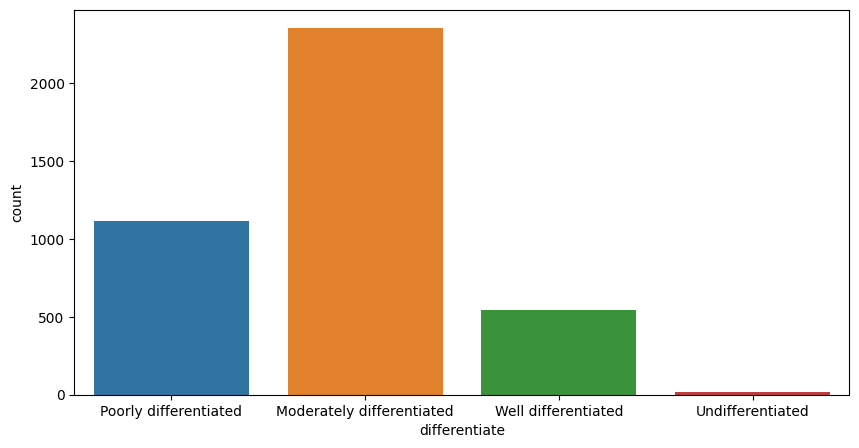


A Stage
Regional    3932
Distant       92
Name: A Stage, dtype: int64


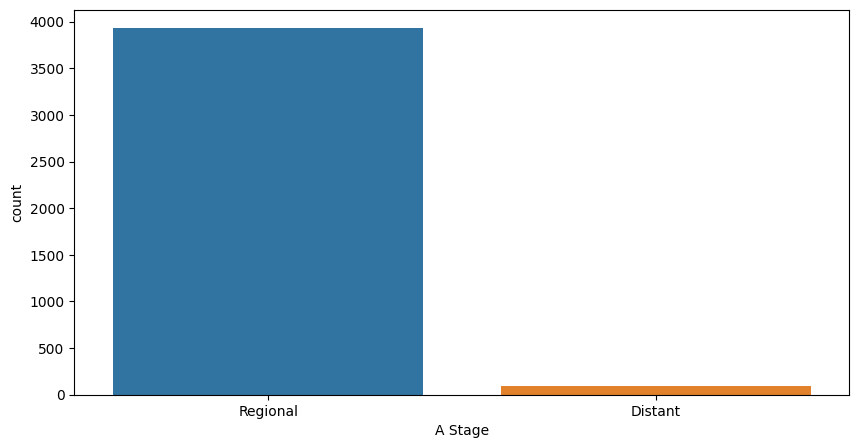


Estrogen Status
Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64


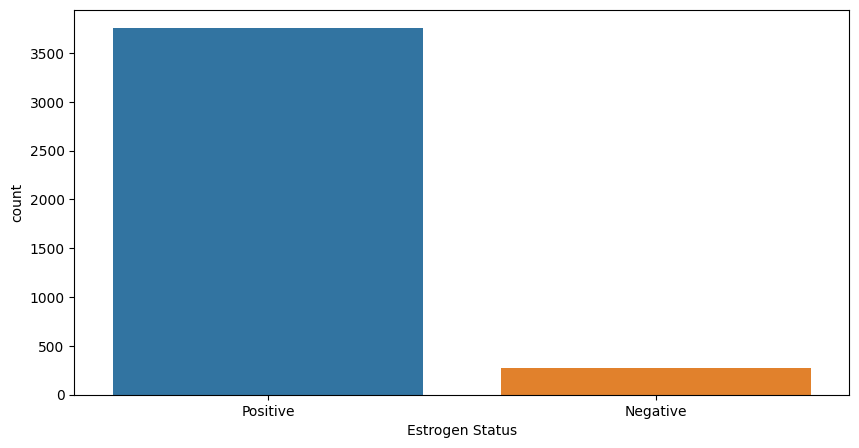


Progesterone Status
Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64


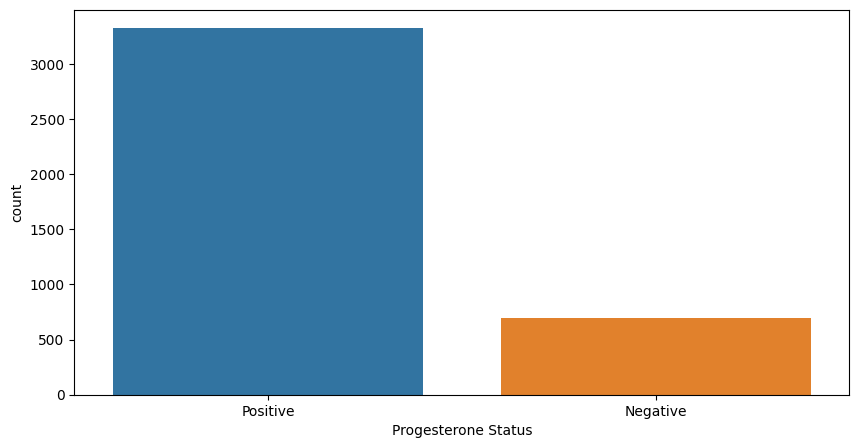


Status
Alive    3408
Dead      616
Name: Status, dtype: int64


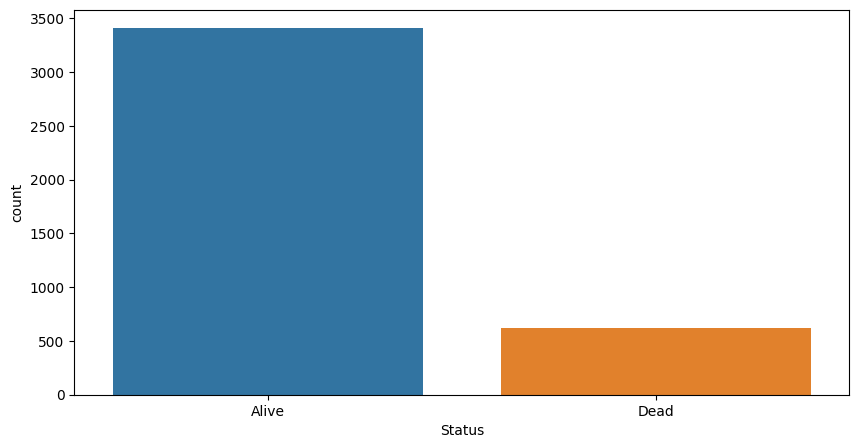

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print("\n" + column)
        print(df[column].value_counts())
        plt.figure(figsize=(10,5))
        sns.countplot(x=column, data=df)
        plt.show()


In [ ]:
# Store the names of all 'object' type columns in the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# Cross Tabulation between categorical variables
for pair in combinations(categorical_cols, 2):
    print("\nCross-tabulation between {} and {}:".format(*pair))
    cross_tab = pd.crosstab(df[pair[0]], df[pair[1]], margins=True)
    display(cross_tab.style.set_caption('Cross-Tabulation').set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'darkblue'),
            ('font-size', '16px')
        ]
    }]))


Cross-tabulation between Race and Marital Status:


Marital Status,Divorced,Married,Separated,Single,Widowed,All
Race,,,,,,
Black,40,113,8,102,28,291
Other,29,237,4,33,17,320
White,417,2293,33,480,190,3413
All,486,2643,45,615,235,4024



Cross-tabulation between Race and T Stage:


T Stage,T1,T2,T3,T4,All
Race,,,,,
Black,117,132,33,9,291
Other,113,162,41,4,320
White,1373,1492,459,89,3413
All,1603,1786,533,102,4024



Cross-tabulation between Race and N Stage:


N Stage,N1,N2,N3,All
Race,,,,
Black,184,63,44,291
Other,211,74,35,320
White,2337,683,393,3413
All,2732,820,472,4024



Cross-tabulation between Race and 6th Stage:


6th Stage,IIA,IIB,IIIA,IIIB,IIIC,All
Race,,,,,,
Black,91,81,69,6,44,291
Other,90,95,96,4,35,320
White,1124,954,885,57,393,3413
All,1305,1130,1050,67,472,4024



Cross-tabulation between Race and differentiate:


differentiate,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,All
Race,,,,,
Black,141,115,3,32,291
Other,180,94,0,46,320
White,2030,902,16,465,3413
All,2351,1111,19,543,4024



Cross-tabulation between Race and A Stage:


A Stage,Distant,Regional,All
Race,,,
Black,8,283,291
Other,7,313,320
White,77,3336,3413
All,92,3932,4024



Cross-tabulation between Race and Estrogen Status:


Estrogen Status,Negative,Positive,All
Race,,,
Black,33,258,291
Other,27,293,320
White,209,3204,3413
All,269,3755,4024



Cross-tabulation between Race and Progesterone Status:


Progesterone Status,Negative,Positive,All
Race,,,
Black,64,227,291
Other,58,262,320
White,576,2837,3413
All,698,3326,4024



Cross-tabulation between Race and Status:


Status,Alive,Dead,All
Race,,,
Black,218,73,291
Other,287,33,320
White,2903,510,3413
All,3408,616,4024



Cross-tabulation between Marital Status and T Stage:


T Stage,T1,T2,T3,T4,All
Marital Status,,,,,
Divorced,179,227,62,18,486
Married,1091,1140,354,58,2643
Separated,16,24,3,2,45
Single,225,288,81,21,615
Widowed,92,107,33,3,235
All,1603,1786,533,102,4024



Cross-tabulation between Marital Status and N Stage:


N Stage,N1,N2,N3,All
Marital Status,,,,
Divorced,317,94,75,486
Married,1832,524,287,2643
Separated,26,9,10,45
Single,408,144,63,615
Widowed,149,49,37,235
All,2732,820,472,4024



Cross-tabulation between Marital Status and 6th Stage:


6th Stage,IIA,IIB,IIIA,IIIB,IIIC,All
Marital Status,,,,,,
Divorced,140,141,119,11,75,486
Married,892,732,689,43,287,2643
Separated,11,13,11,0,10,45
Single,188,185,167,12,63,615
Widowed,74,59,64,1,37,235
All,1305,1130,1050,67,472,4024



Cross-tabulation between Marital Status and differentiate:


differentiate,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,All
Marital Status,,,,,
Divorced,288,145,1,52,486
Married,1569,698,11,365,2643
Separated,24,12,1,8,45
Single,342,191,5,77,615
Widowed,128,65,1,41,235
All,2351,1111,19,543,4024



Cross-tabulation between Marital Status and A Stage:


A Stage,Distant,Regional,All
Marital Status,,,
Divorced,15,471,486
Married,54,2589,2643
Separated,3,42,45
Single,17,598,615
Widowed,3,232,235
All,92,3932,4024



Cross-tabulation between Marital Status and Estrogen Status:


Estrogen Status,Negative,Positive,All
Marital Status,,,
Divorced,27,459,486
Married,173,2470,2643
Separated,7,38,45
Single,47,568,615
Widowed,15,220,235
All,269,3755,4024



Cross-tabulation between Marital Status and Progesterone Status:


Progesterone Status,Negative,Positive,All
Marital Status,,,
Divorced,90,396,486
Married,439,2204,2643
Separated,15,30,45
Single,106,509,615
Widowed,48,187,235
All,698,3326,4024



Cross-tabulation between Marital Status and Status:


Status,Alive,Dead,All
Marital Status,,,
Divorced,396,90,486
Married,2285,358,2643
Separated,30,15,45
Single,511,104,615
Widowed,186,49,235
All,3408,616,4024



Cross-tabulation between T Stage and N Stage:


N Stage,N1,N2,N3,All
T Stage,,,,
T1,1305,211,87,1603
T2,1130,428,228,1786
T3,262,149,122,533
T4,35,32,35,102
All,2732,820,472,4024



Cross-tabulation between T Stage and 6th Stage:


6th Stage,IIA,IIB,IIIA,IIIB,IIIC,All
T Stage,,,,,,
T1,1305,0,211,0,87,1603
T2,0,1130,428,0,228,1786
T3,0,0,411,0,122,533
T4,0,0,0,67,35,102
All,1305,1130,1050,67,472,4024



Cross-tabulation between T Stage and differentiate:


differentiate,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,All
T Stage,,,,,
T1,975,344,5,279,1603
T2,1025,556,5,200,1786
T3,303,168,7,55,533
T4,48,43,2,9,102
All,2351,1111,19,543,4024



Cross-tabulation between T Stage and A Stage:


A Stage,Distant,Regional,All
T Stage,,,
T1,9,1594,1603
T2,30,1756,1786
T3,15,518,533
T4,38,64,102
All,92,3932,4024



Cross-tabulation between T Stage and Estrogen Status:


Estrogen Status,Negative,Positive,All
T Stage,,,
T1,86,1517,1603
T2,124,1662,1786
T3,43,490,533
T4,16,86,102
All,269,3755,4024



Cross-tabulation between T Stage and Progesterone Status:


Progesterone Status,Negative,Positive,All
T Stage,,,
T1,241,1362,1603
T2,321,1465,1786
T3,114,419,533
T4,22,80,102
All,698,3326,4024



Cross-tabulation between T Stage and Status:


Status,Alive,Dead,All
T Stage,,,
T1,1446,157,1603
T2,1483,303,1786
T3,417,116,533
T4,62,40,102
All,3408,616,4024



Cross-tabulation between N Stage and 6th Stage:


6th Stage,IIA,IIB,IIIA,IIIB,IIIC,All
N Stage,,,,,,
N1,1305,1130,262,35,0,2732
N2,0,0,788,32,0,820
N3,0,0,0,0,472,472
All,1305,1130,1050,67,472,4024



Cross-tabulation between N Stage and differentiate:


differentiate,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,All
N Stage,,,,,
N1,1635,651,10,436,2732
N2,489,253,4,74,820
N3,227,207,5,33,472
All,2351,1111,19,543,4024



Cross-tabulation between N Stage and A Stage:


A Stage,Distant,Regional,All
N Stage,,,
N1,11,2721,2732
N2,13,807,820
N3,68,404,472
All,92,3932,4024



Cross-tabulation between N Stage and Estrogen Status:


Estrogen Status,Negative,Positive,All
N Stage,,,
N1,141,2591,2732
N2,67,753,820
N3,61,411,472
All,269,3755,4024



Cross-tabulation between N Stage and Progesterone Status:


Progesterone Status,Negative,Positive,All
N Stage,,,
N1,418,2314,2732
N2,155,665,820
N3,125,347,472
All,698,3326,4024



Cross-tabulation between N Stage and Status:


Status,Alive,Dead,All
N Stage,,,
N1,2462,270,2732
N2,655,165,820
N3,291,181,472
All,3408,616,4024



Cross-tabulation between 6th Stage and differentiate:


differentiate,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,All
6th Stage,,,,,
IIA,801,251,4,249,1305
IIB,663,314,2,151,1130
IIIA,625,315,8,102,1050
IIIB,35,24,0,8,67
IIIC,227,207,5,33,472
All,2351,1111,19,543,4024



Cross-tabulation between 6th Stage and A Stage:


A Stage,Distant,Regional,All
6th Stage,,,
IIA,0,1305,1305
IIB,0,1130,1130
IIIA,0,1050,1050
IIIB,24,43,67
IIIC,68,404,472
All,92,3932,4024



Cross-tabulation between 6th Stage and Estrogen Status:


Estrogen Status,Negative,Positive,All
6th Stage,,,
IIA,59,1246,1305
IIB,63,1067,1130
IIIA,75,975,1050
IIIB,11,56,67
IIIC,61,411,472
All,269,3755,4024



Cross-tabulation between 6th Stage and Progesterone Status:


Progesterone Status,Negative,Positive,All
6th Stage,,,
IIA,182,1123,1305
IIB,178,952,1130
IIIA,199,851,1050
IIIB,14,53,67
IIIC,125,347,472
All,698,3326,4024



Cross-tabulation between 6th Stage and Status:


Status,Alive,Dead,All
6th Stage,,,
IIA,1209,96,1305
IIB,995,135,1130
IIIA,866,184,1050
IIIB,47,20,67
IIIC,291,181,472
All,3408,616,4024



Cross-tabulation between differentiate and A Stage:


A Stage,Distant,Regional,All
differentiate,,,
Moderately differentiated,43,2308,2351
Poorly differentiated,39,1072,1111
Undifferentiated,0,19,19
Well differentiated,10,533,543
All,92,3932,4024



Cross-tabulation between differentiate and Estrogen Status:


Estrogen Status,Negative,Positive,All
differentiate,,,
Moderately differentiated,82,2269,2351
Poorly differentiated,174,937,1111
Undifferentiated,5,14,19
Well differentiated,8,535,543
All,269,3755,4024



Cross-tabulation between differentiate and Progesterone Status:


Progesterone Status,Negative,Positive,All
differentiate,,,
Moderately differentiated,328,2023,2351
Poorly differentiated,319,792,1111
Undifferentiated,4,15,19
Well differentiated,47,496,543
All,698,3326,4024



Cross-tabulation between differentiate and Status:


Status,Alive,Dead,All
differentiate,,,
Moderately differentiated,2046,305,2351
Poorly differentiated,848,263,1111
Undifferentiated,10,9,19
Well differentiated,504,39,543
All,3408,616,4024



Cross-tabulation between A Stage and Estrogen Status:


Estrogen Status,Negative,Positive,All
A Stage,,,
Distant,16,76,92
Regional,253,3679,3932
All,269,3755,4024



Cross-tabulation between A Stage and Progesterone Status:


Progesterone Status,Negative,Positive,All
A Stage,,,
Distant,22,70,92
Regional,676,3256,3932
All,698,3326,4024



Cross-tabulation between A Stage and Status:


Status,Alive,Dead,All
A Stage,,,
Distant,57,35,92
Regional,3351,581,3932
All,3408,616,4024



Cross-tabulation between Estrogen Status and Progesterone Status:


Progesterone Status,Negative,Positive,All
Estrogen Status,,,
Negative,242,27,269
Positive,456,3299,3755
All,698,3326,4024



Cross-tabulation between Estrogen Status and Status:


Status,Alive,Dead,All
Estrogen Status,,,
Negative,161,108,269
Positive,3247,508,3755
All,3408,616,4024



Cross-tabulation between Progesterone Status and Status:


Status,Alive,Dead,All
Progesterone Status,,,
Negative,494,204,698
Positive,2914,412,3326
All,3408,616,4024


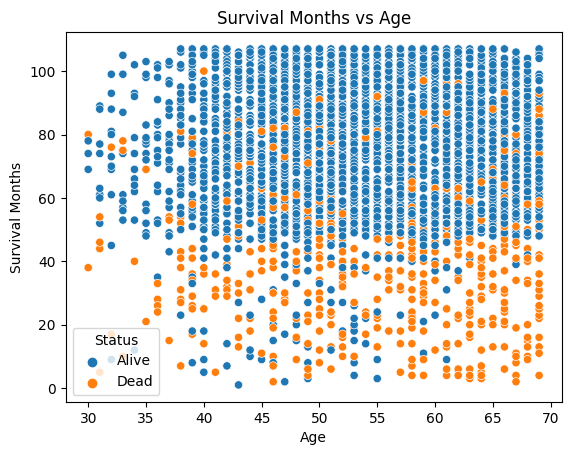

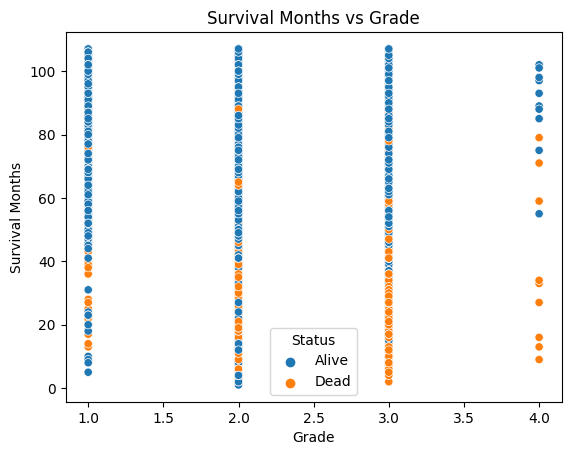

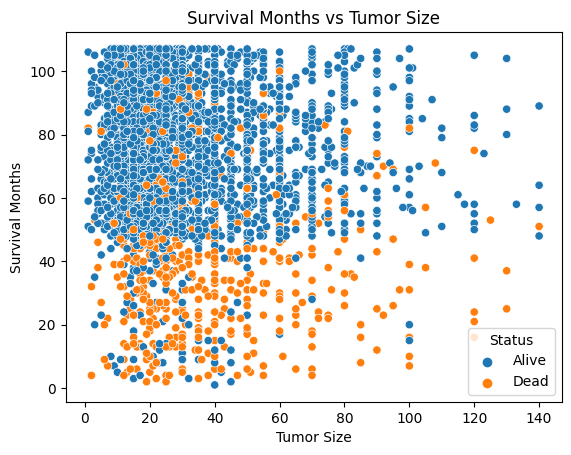

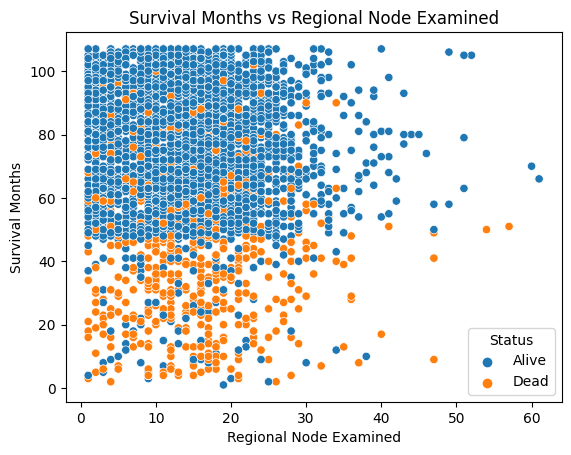

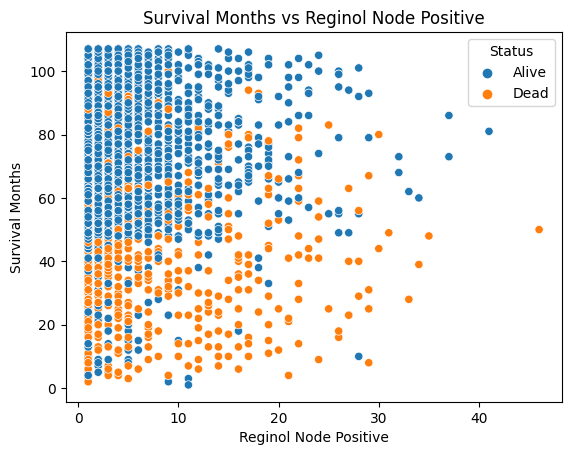

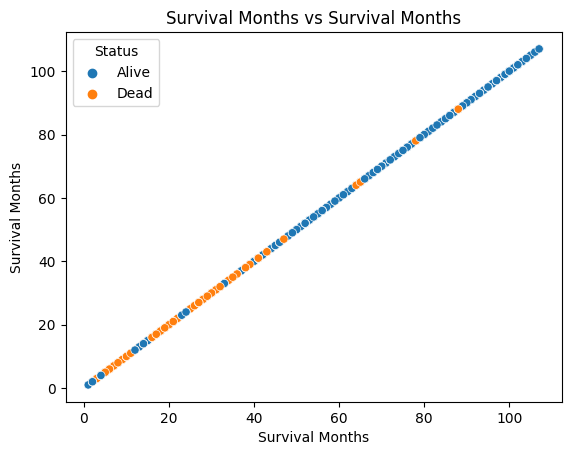

In [13]:
# Store the names of all numerical columns in the DataFrame
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Scatter plots for relationship between numerical variables and survival
for col in numerical_cols:
    sns.scatterplot(data=df, x=col, y="Survival Months", hue="Status")
    plt.title(f"Survival Months vs {col}")
    plt.show()

### Outliers

In [14]:
# Define a function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] < lower_limit) | (df[column] > upper_limit)]

# Define a function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

# Print the outliers for each numerical column
for column in numerical_cols:
    outliers = identify_outliers(df, column)
    print(f"\nOutliers for {column}:")
    print(outliers[column])
    print(f"Number of outliers in {column}: {len(outliers)}")

# Remove the outliers
for column in numerical_cols:
    df = remove_outliers(df, column)


Outliers for Age:
Series([], Name: Age, dtype: int64)
Number of outliers in Age: 0

Outliers for Grade:
Series([], Name: Grade, dtype: int64)
Number of outliers in Grade: 0

Outliers for Tumor Size:
8       103
52      120
53       77
63       75
70      130
       ... 
3930    120
3965    140
3991     90
4009    100
4012     80
Name: Tumor Size, Length: 222, dtype: int64
Number of outliers in Tumor Size: 222

Outliers for Regional Node Examined:
57      49
227     42
289     41
290     39
303     46
        ..
3893    40
3923    36
3950    60
3957    37
3990    39
Name: Regional Node Examined, Length: 72, dtype: int64
Number of outliers in Regional Node Examined: 72

Outliers for Reginol Node Positive:
8       18
9       12
14      14
24      22
25      17
        ..
3974    13
3985    19
3992    19
3995    14
4012    12
Name: Reginol Node Positive, Length: 344, dtype: int64
Number of outliers in Reginol Node Positive: 344

Outliers for Survival Months:
414     3
679     4
721     3


In [15]:
categorical_cols = ['Race', 'Marital Status', 'A Stage', 'T Stage', 'N Stage',
                     '6th Stage', 'differentiate', 'Estrogen Status', 'Progesterone Status']

onehot_encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = onehot_encoder.get_feature_names_out()

numerical_cols = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Grade']]
df_encoded = pd.concat([numerical_cols, encoded_cols, df["Status"]], axis=1)

# Use MinMaxScaler to normalize numerical features
scaler = StandardScaler()
df_encoded[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Grade']] = scaler.fit_transform(
    df_encoded[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Grade']])



# Count number of rows before dropping NA
num_rows_before = df_encoded.shape[0]
df_encoded = df_encoded.dropna()
num_rows_after = df_encoded.shape[0]

print(f"Number of rows before dropping NA: {num_rows_before}")
print(f"Number of rows after dropping NA: {num_rows_after}")
print(f"Number of rows dropped: {num_rows_before - num_rows_after}")


Number of rows before dropping NA: 3888
Number of rows after dropping NA: 2646
Number of rows dropped: 1242


## K Means Clustering

The optimal number of clusters according to Elbow Method is: 9
The optimal number of clusters according to Silhouette Score is: 2


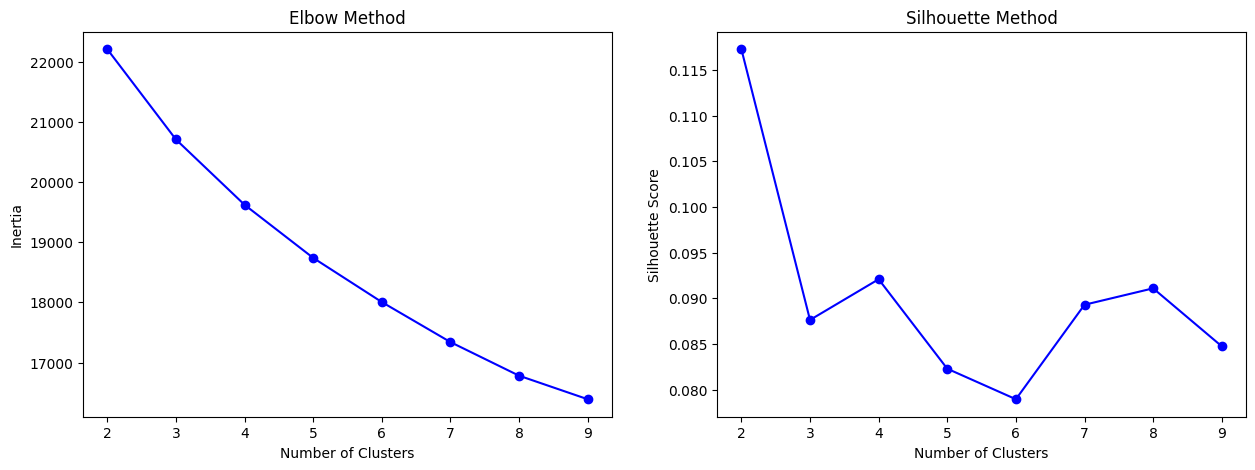

In [439]:
df_encoded_cluster = df_encoded.drop(['Status'], axis=1)


elbow_scores = []
silhouette_scores = []

cluster_range = range(2, 10)

for num_clusters in cluster_range:
    # Elbow Method
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_encoded_cluster)
    elbow_scores.append(kmeans.inertia_)
    
    # Silhouette Method
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_encoded_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Finding the optimal number of clusters
optimal_clusters_elbow = elbow_scores.index(min(elbow_scores)) + 2
optimal_clusters_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"The optimal number of clusters according to Elbow Method is: {optimal_clusters_elbow}")
print(f"The optimal number of clusters according to Silhouette Score is: {optimal_clusters_silhouette}")

# Plotting Elbow and Silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Elbow Method plot
ax1.plot(cluster_range, elbow_scores, 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

# Silhouette Method plot
ax2.plot(cluster_range, silhouette_scores, 'bo-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method')

plt.show()

              Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
cluster                                                                        
0        0.079099    0.086477                0.461448               1.800350   
1       -0.780472   -0.289391                0.331127              -0.361170   
2       -0.055329    1.851858               -0.064214               0.110623   
3        0.598896   -0.537091               -0.427397              -0.503275   

         Survival Months     Grade  Race_Black  Race_Other  Race_White  \
cluster                                                                  
0              -0.257132  0.254029    0.062802    0.082126    0.855072   
1               0.100622  0.458590    0.056511    0.083538    0.859951   
2              -0.129586  0.160547    0.067010    0.069588    0.863402   
3               0.083445 -0.491606    0.075728    0.079612    0.844660   

         Marital Status_Divorced  ...  6th Stage_IIIB  6th Stage_IIIC  \
c

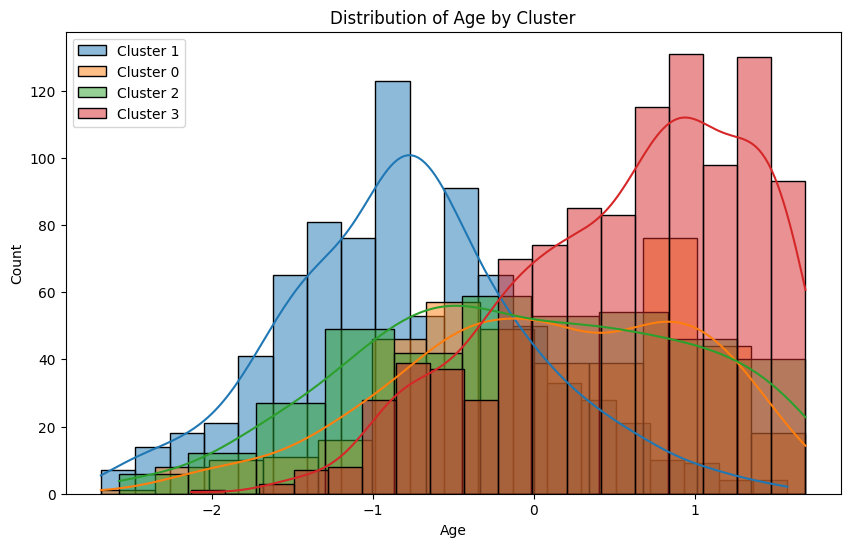

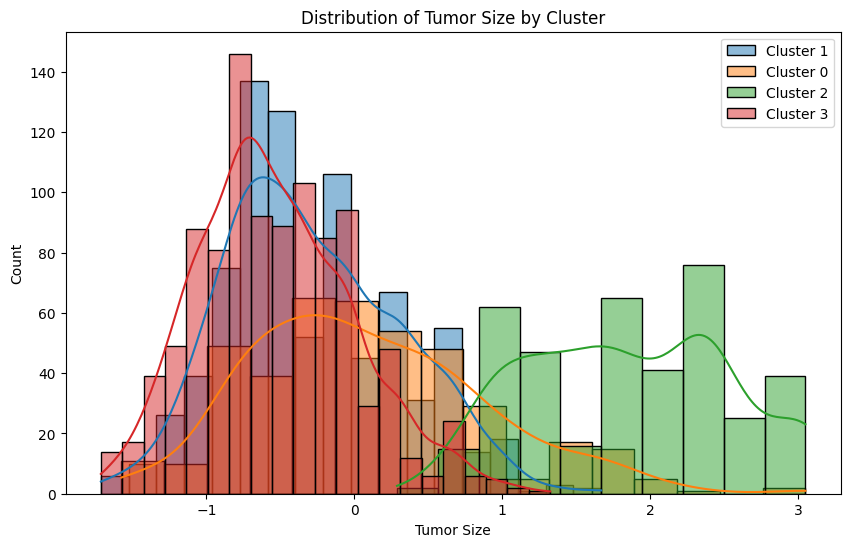

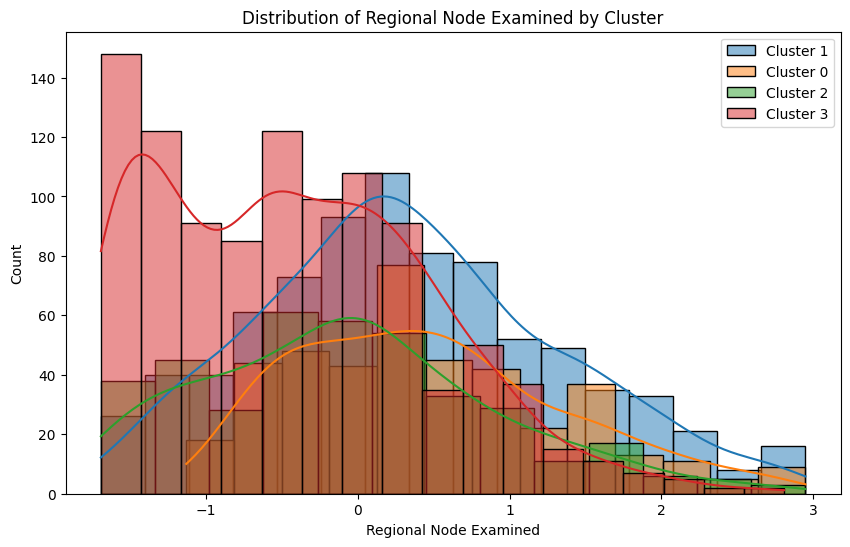

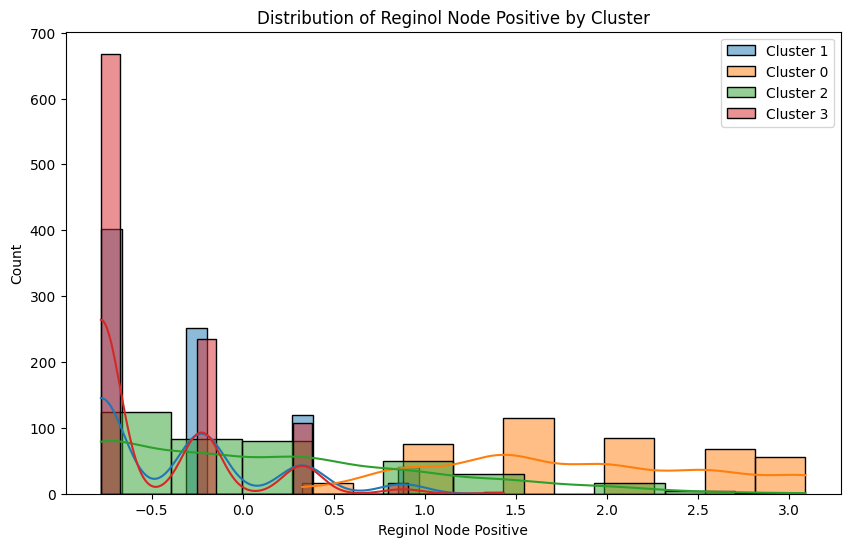

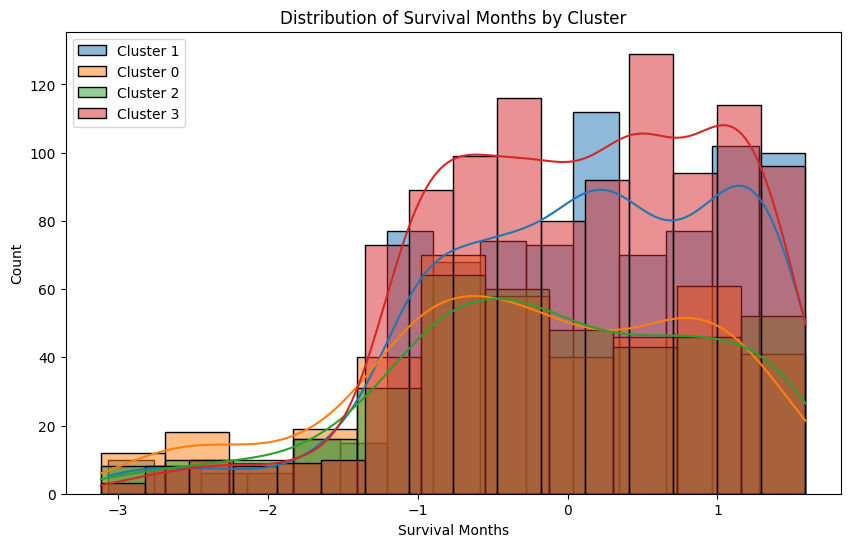

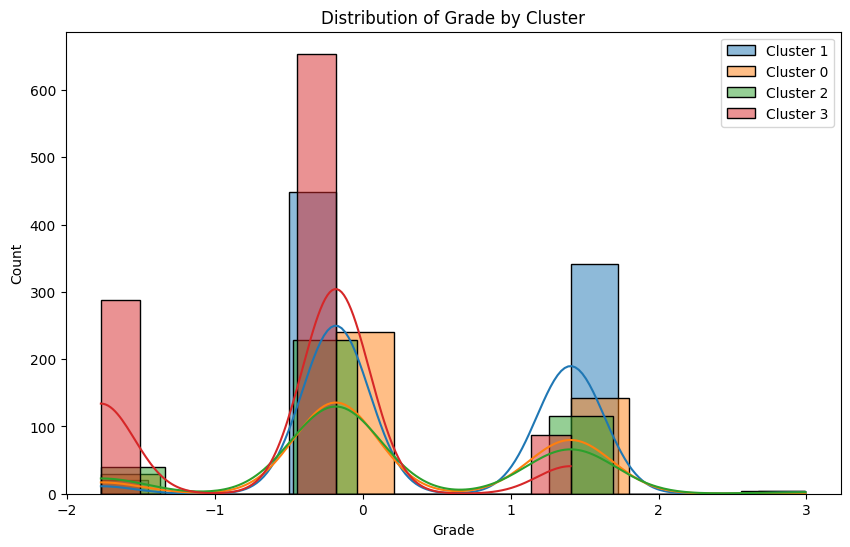

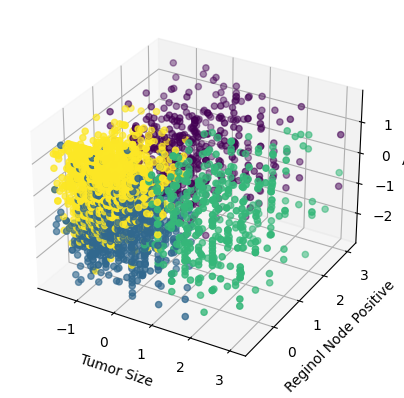

Index(['Tumor Size', 'Reginol Node Positive'], dtype='object')


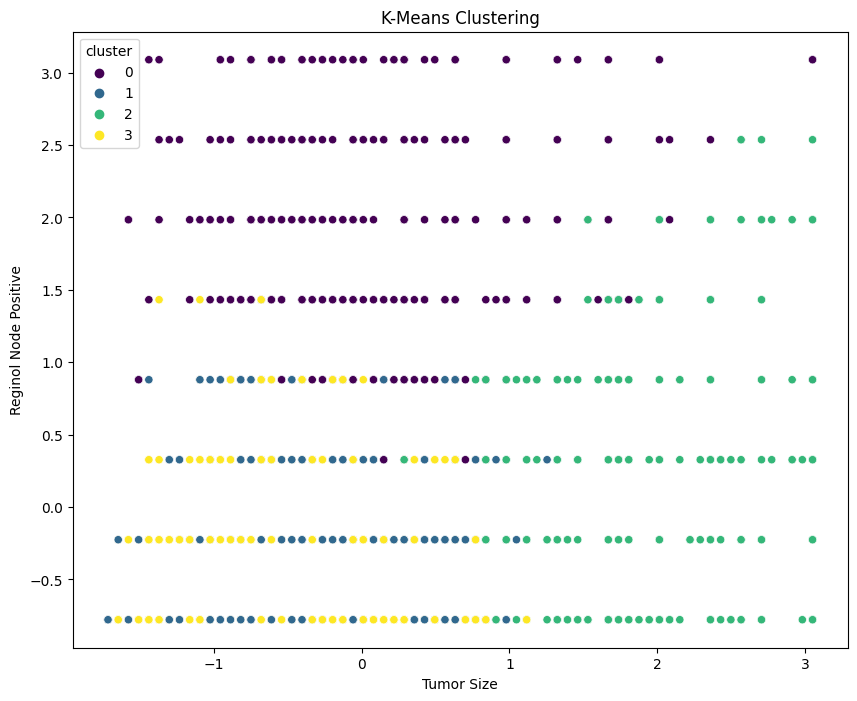

In [440]:
model = KMeans(n_clusters=4, random_state=123)
model.fit(df_encoded_cluster)

# Append clusters to input features
df_encoded_cluster['cluster'] = model.labels_

# Group by cluster and calculate mean
cluster_characteristics = df_encoded_cluster.groupby('cluster').mean()

print(cluster_characteristics)

# Get cluster centroids
centroids = model.cluster_centers_
# Create DataFrame for centroids
df_centroids = pd.DataFrame(centroids, columns=df_encoded_cluster.columns[:-1])
# Calculate the standard deviation of the centroids
centroid_std = df_centroids.std()

# Sort by standard deviation and get the top three
sorted_centroid_std = centroid_std.sort_values(ascending=False)
top_features = sorted_centroid_std.index[:3]
print(top_features)


for col in numerical_cols.columns:
    plt.figure(figsize=(10,6))
    for cluster in df_encoded_cluster['cluster'].unique():
        sns.histplot(df_encoded_cluster[df_encoded_cluster['cluster'] == cluster][col], kde=True, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {col} by Cluster')
    plt.legend()
    plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_encoded_cluster[top_features[0]], df_encoded_cluster[top_features[1]], df_encoded_cluster[top_features[2]], c=df_encoded_cluster['cluster'])
ax.set_xlabel(top_features[0])
ax.set_ylabel(top_features[1])
ax.set_zlabel(top_features[2])
plt.show()

# Get the top 2
top_features = sorted_centroid_std.index[:2]
print(top_features)

# Plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_encoded_cluster, x=top_features[0], y=top_features[1], hue='cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

## KNN model

In [441]:
# do it with cv and grid search

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# remove Survival Months
X = df_encoded.drop(['Status', 'Survival Months'], axis=1)
y = df_encoded['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)


knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_
knn_cv.best_score_

# test set accuracy
knn_cv.score(X_test, y_test)

0.8811320754716981

In [442]:
y_pred = knn_cv.predict(X_test)
print(classification_report(y_test.to_numpy(), y_pred))

              precision    recall  f1-score   support

       Alive       0.88      1.00      0.94       468
        Dead       0.00      0.00      0.00        62

    accuracy                           0.88       530
   macro avg       0.44      0.50      0.47       530
weighted avg       0.78      0.88      0.83       530



In [443]:
# confusion matrix
confusion_matrix(y_test.to_numpy(), y_pred)

array([[467,   1],
       [ 62,   0]], dtype=int64)

In [444]:
# check importance of each variable
r = permutation_importance(knn_cv, X_test, y_test,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8} "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

## SVM with custom kernel

In [445]:
from numba import njit
import numba as nb
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# gammaList = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
CList = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

@njit
def histogramKernel(xs, ys):
    return np.minimum(xs, ys).sum()

class GramBuilder:
    def __init__(self, Kernel):
        self._Kernel = Kernel
    def generateMatrixBuilder(self, X1, X2):
        gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
        for i, x1 in enumerate(X1):
            for j, x2 in enumerate(X2):
                gram_matrix[i, j] = self._Kernel(x1, x2)
        
        return gram_matrix
    

histo_svc = svm.SVC(kernel=GramBuilder(histogramKernel).generateMatrixBuilder)
histo_clf = GridSearchCV(histo_svc, {'C' : CList}, verbose = 1, n_jobs = -1)
histo_clf.fit(X_train.to_numpy(), y_train.to_numpy())

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(estimator=SVC(kernel=<bound method GramBuilder.generateMatrixBuilder of <__main__.GramBuilder object at 0x0000028739C27370>>),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             verbose=1)

In [446]:
print("Best parameters set found on development set:")
print(histo_clf.best_params_)
print() 
print("Grid scores on train set:")
means = histo_clf.cv_results_['mean_test_score']
stds = histo_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, histo_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))

Best parameters set found on development set:
{'C': 0.001}

Grid scores on train set:
0.888 (+/-0.002) for {'C': 0.001}
0.888 (+/-0.002) for {'C': 0.01}
0.888 (+/-0.002) for {'C': 0.1}
0.887 (+/-0.005) for {'C': 1}
0.886 (+/-0.006) for {'C': 10}
0.886 (+/-0.006) for {'C': 100}
0.886 (+/-0.006) for {'C': 1000}


In [447]:
# test set

y_pred = histo_clf.predict(X_test.to_numpy())
print("Accuracy score on test set: ", accuracy_score(y_test.to_numpy(), y_pred))

Accuracy score on test set:  0.8830188679245283


In [448]:
confusion_matrix(y_test.to_numpy(), y_pred)

array([[468,   0],
       [ 62,   0]], dtype=int64)

In [449]:
print(classification_report(y_test.to_numpy(), y_pred))

              precision    recall  f1-score   support

       Alive       0.88      1.00      0.94       468
        Dead       0.00      0.00      0.00        62

    accuracy                           0.88       530
   macro avg       0.44      0.50      0.47       530
weighted avg       0.78      0.88      0.83       530



## Random forest based classifiers

In [450]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(1, 100, 10), 'max_depth': np.arange(3, 25, 3),
               'min_samples_split': np.arange(2, 5)}
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_, rf_cv.best_score_

({'max_depth': 18, 'min_samples_split': 2, 'n_estimators': 81},
 0.8894152281546901)

In [451]:
# test set accuracy
y_pred = rf_cv.predict(X_test)

print(classification_report(y_test.to_numpy(), y_pred))

# confusion matrix
confusion_matrix(y_test.to_numpy(), y_pred)


              precision    recall  f1-score   support

       Alive       0.88      1.00      0.94       468
        Dead       0.50      0.02      0.03        62

    accuracy                           0.88       530
   macro avg       0.69      0.51      0.48       530
weighted avg       0.84      0.88      0.83       530



array([[467,   1],
       [ 61,   1]], dtype=int64)